# Libraries of Pythong and languges used for AI (Machine Learning Diagnostic App)
* Pandas: for Data Analysis.
* Numpy: for numerical operations.
* Matplotlib: for Data Visualization.
* Scikit-learn for spliting data into Training and Test sets
* Seaborn: for Data Visualization.
* Tensorflow: for Modeling.
* Tensorflow Lite: for converting our trained Model to working model on Mobile and API Handling.
* Flutter for User-Interface, taking Input, and presenting output to the User.

In [125]:
import numpy as np # np is short for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import tensorflow as tf

In [126]:

df = pd.read_csv("/content/sample_data/heart_disease.csv")
df.shape

(303, 14)

### 1.4 Which features of the data will be important to us?

Features are different parts and characteristics of the data.

During this step, you'll want to start exploring what each portion of the data relates to and then create a reference you can use to look up later on.

One of the most common ways to do this is to create a **data dictionary**.

#### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with.

Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [127]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
df.target.value_counts()

,count
target,
1,165
0,138


In [129]:

# Normalized value counts
print("percetange of people who has/has not heart-disease:",df.target.value_counts(normalize=True)*100)

percetange of people who has/has not heart-disease: target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


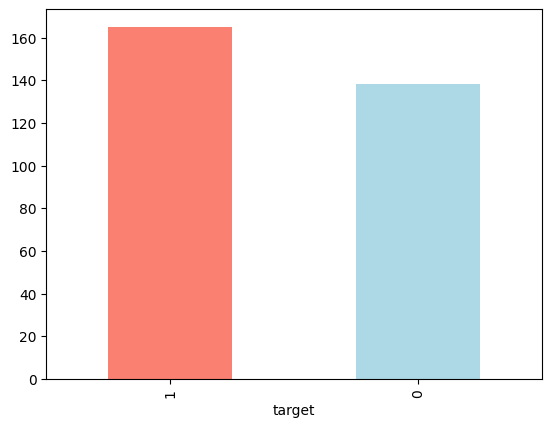

In [130]:


# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [132]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [133]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [134]:

# Compare target column with sex column
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


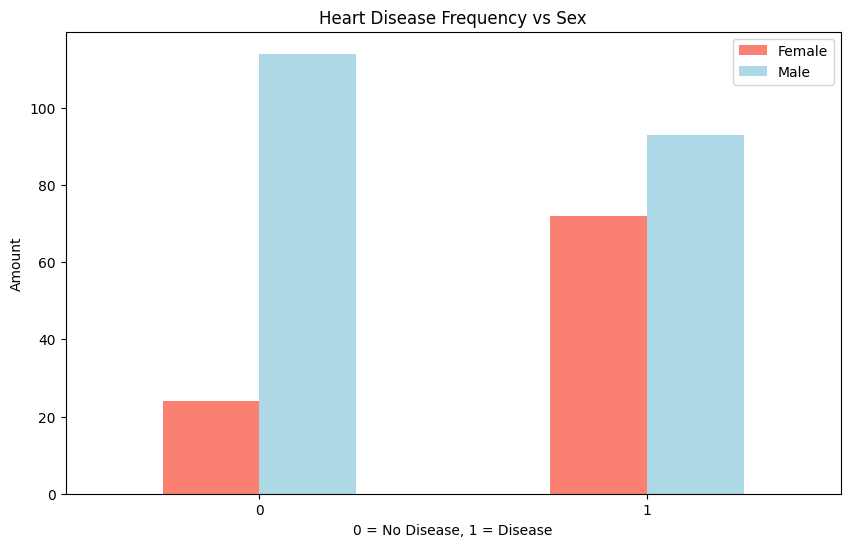

In [135]:
# Let's visualize it
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Comparing age and maximum heart rate

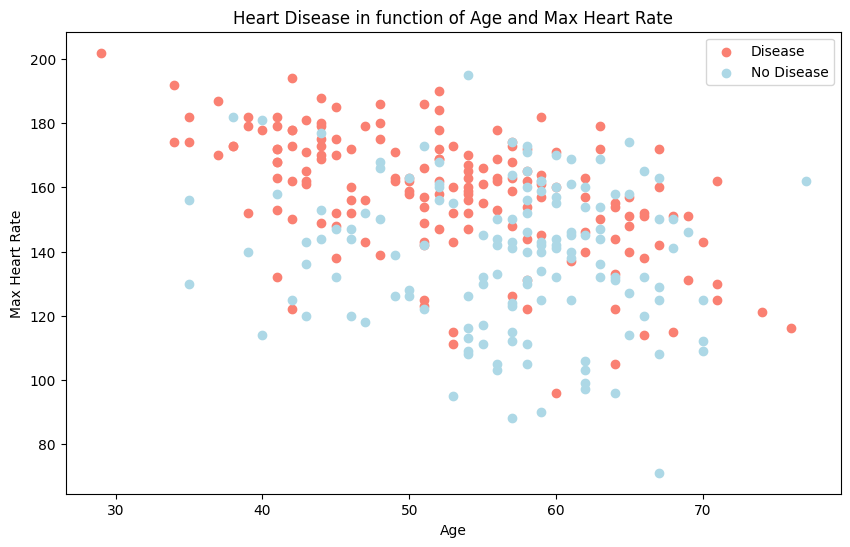

In [136]:

# Histograms are a great way to check the distribution of a variable
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

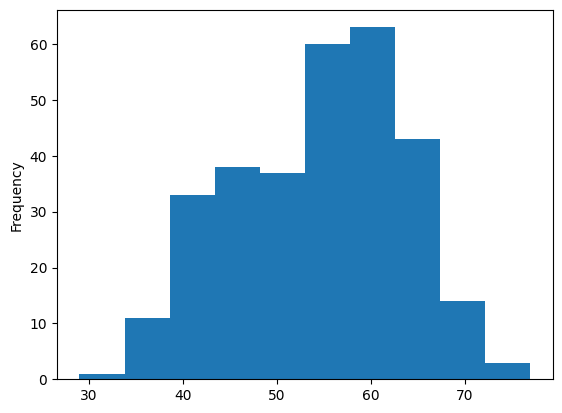

In [137]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

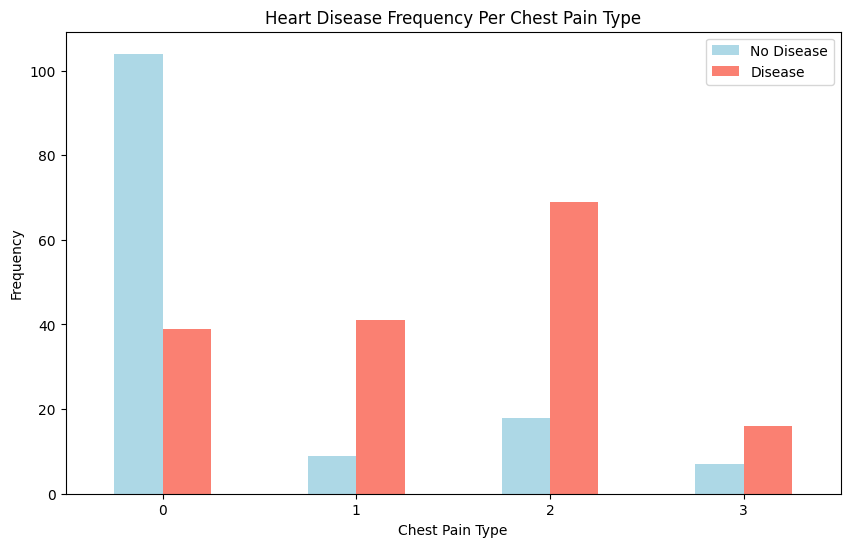

In [138]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
    
It's interesting that atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does *atypical agina* even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values.

This research may come in the form of asking a **subject matter expert** (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems [even some medical professionals are confused by the term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/).

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, the plot above is a sign there may be a confusion of defintions being represented in data.

In [139]:
## Turning our Data into X and y (Features and labels)
# Everything except target variable
X = df.drop(labels="target", axis=1)

# Target variable
y = df.target


### Turning our data into training and Test sets

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
print("Mean of X_train after scaling:\n", X_train.mean())
print("Standard deviation of X_train after scaling:\n", X_train.std())

Mean of X_train after scaling:
 age          54.462810
sex           0.657025
cp            0.991736
trestbps    130.359504
chol        246.842975
fbs           0.128099
restecg       0.553719
thalach     150.115702
exang         0.314050
oldpeak       1.013223
slope         1.421488
ca            0.681818
thal          2.301653
dtype: float64
Standard deviation of X_train after scaling:
 age          9.204492
sex          0.475687
cp           1.022533
trestbps    16.828858
chol        52.795465
fbs          0.334893
restecg      0.530410
thalach     22.352398
exang        0.465098
oldpeak      1.102577
slope        0.607724
ca           0.990620
thal         0.593811
dtype: float64


In [142]:
# Define the model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.5275 - loss: 15.5756 - val_accuracy: 0.5246 - val_loss: 10.4415
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5152 - loss: 5.9806 - val_accuracy: 0.5410 - val_loss: 1.3288
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5351 - loss: 1.1235 - val_accuracy: 0.7705 - val_loss: 0.5351
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5198 - loss: 0.7715 - val_accuracy: 0.7049 - val_loss: 0.5586
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5594 - loss: 0.7264 - val_accuracy: 0.6230 - val_loss: 0.6313
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5942 - loss: 0.6767 - val_accuracy: 0.6557 - val_loss: 0.5626
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6536 - loss: 0.6187 - val_accuracy: 0.8197 - val_loss: 0.5208
Epoch 8/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6765 - loss: 0.5980 - val_accuracy: 0.8033 - val_loss: 0.50

In [143]:
sample_input = np.array([
    [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 1.0],
])
# Run prediction
prediction = model.predict(sample_input)

# Print result
print("Raw prediction (sigmoid output):", prediction)

# Interpretation
if prediction[0][0] >= 0.5:
    print("Prediction: 🔴 Likely has heart disease")
else:
    print("Prediction: 🟢 Likely healthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Raw prediction (sigmoid output): [[0.9588341]]
Prediction: 🔴 Likely has heart disease


In [144]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8391 - loss: 0.3930


[0.3683442771434784, 0.8524590134620667]

In [145]:
history = model.fit(X_train, y_train,

                    epochs=100,  # Train longer
                    batch_size=32,
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8051 - loss: 0.4149 
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8176 - loss: 0.3781 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8534 - loss: 0.3824 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8064 - loss: 0.4068 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7934 - loss: 0.4136 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8176 - loss: 0.3779 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8545 - loss: 0.3725 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8059 - loss: 0.3922 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7675 - loss: 0.4167 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8143 - loss: 0.3889 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8503 - loss: 0.3700
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8284 - los

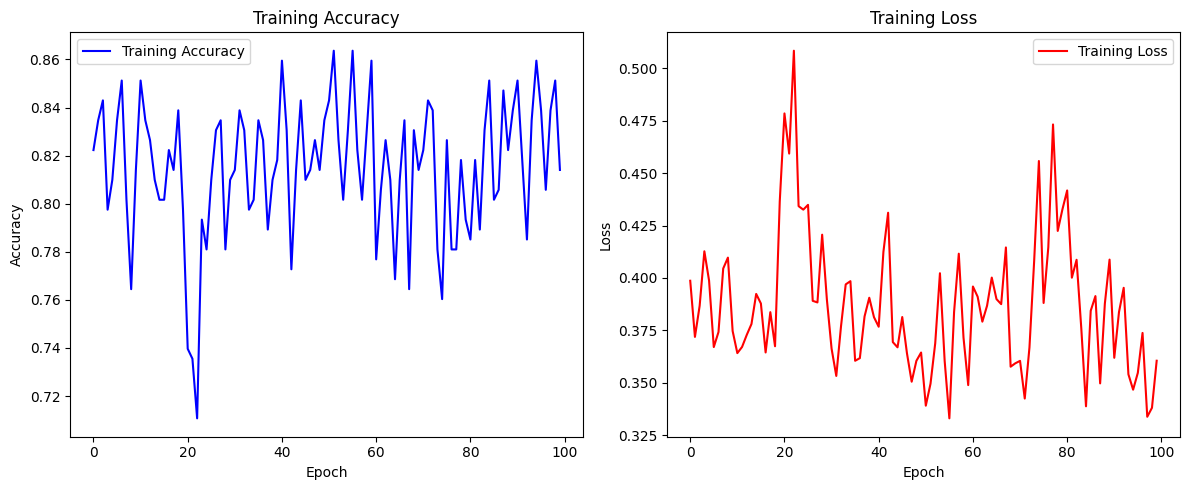

In [146]:
# 4. Plotting function for training-only metrics
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r-', label='Training Loss')
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.show()

# 5. Generate the plot
plot_training_curves(history)

In [147]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_training_curves_advanced(history):
    """Plot beautiful interactive training curves with Plotly"""
    # Create subplots
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=('<b>Model Accuracy</b>', '<b>Model Loss</b>'),
                       horizontal_spacing=0.15)

    # Calculate epochs (fixed the parenthesis issue here)
    epochs = list(range(1, len(history.history['accuracy']) + 1))

    # Add accuracy traces
    fig.add_trace(
        go.Scatter(
            x=epochs,
            y=history.history['accuracy'],
            mode='lines+markers',
            name='Training Accuracy',
            line=dict(color='#1f77b4', width=3),
            marker=dict(size=8),
            hovertemplate='Epoch: %{x}<br>Accuracy: %{y:.3f}'
        ),
        row=1, col=1
    )

    # Add validation accuracy if available
    if 'val_accuracy' in history.history:
        fig.add_trace(
            go.Scatter(
                x=epochs,
                y=history.history['val_accuracy'],
                mode='lines+markers',
                name='Validation Accuracy',
                line=dict(color='#ff7f0e', width=3, dash='dot'),
                marker=dict(size=8),
                hovertemplate='Epoch: %{x}<br>Val Accuracy: %{y:.3f}'
            ),
            row=1, col=1
        )

    # Add loss traces
    fig.add_trace(
        go.Scatter(
            x=epochs,
            y=history.history['loss'],
            mode='lines+markers',
            name='Training Loss',
            line=dict(color='#d62728', width=3),
            marker=dict(size=8),
            hovertemplate='Epoch: %{x}<br>Loss: %{y:.3f}'
        ),
        row=1, col=2
    )

    # Add validation loss if available
    if 'val_loss' in history.history:
        fig.add_trace(
            go.Scatter(
                x=epochs,
                y=history.history['val_loss'],
                mode='lines+markers',
                name='Validation Loss',
                line=dict(color='#2ca02c', width=3, dash='dot'),
                marker=dict(size=8),
                hovertemplate='Epoch: %{x}<br>Val Loss: %{y:.3f}'
            ),
            row=1, col=2
        )

    # Update layout
    fig.update_layout(
        title_text='<b>Training Metrics</b>',
        title_x=0.5,
        title_font=dict(size=24, family='Arial', color='darkblue'),
        showlegend=True,
        hovermode='x unified',
        template='plotly_white',
        width=1000,
        height=500,
        margin=dict(l=50, r=50, b=50, t=100, pad=4),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Update axes
    fig.update_xaxes(title_text='Epoch', row=1, col=1)
    fig.update_yaxes(title_text='Accuracy', row=1, col=1)
    fig.update_xaxes(title_text='Epoch', row=1, col=2)
    fig.update_yaxes(title_text='Loss', row=1, col=2)

    # Save and show

    fig.show()


In [148]:
plot_training_curves_advanced(history)

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model1 = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(13,), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layers
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    # Output layer
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                      'Precision',
                      'Recall'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [150]:
history = model1.fit(X_train, y_train,

                    epochs=100,  # Train longer
                    batch_size=32,
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - Precision: 0.6921 - Recall: 0.6239 - accuracy: 0.6427 - loss: 1.4197
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.7158 - Recall: 0.6074 - accuracy: 0.6540 - loss: 1.2582 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Precision: 0.6620 - Recall: 0.6437 - accuracy: 0.6240 - loss: 1.2559
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.7054 - Recall: 0.6360 - accuracy: 0.6563 - loss: 1.2017 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.6990 - Recall: 0.6846 - accuracy: 0.6673 - loss: 1.1592 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.7603 - Recall: 0.7419 - accuracy: 0.7313 - loss: 1.0911 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.6730 - Recall: 0.6899 - accuracy: 0.6475 - loss: 1.1550 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Precision: 0.7389 - Recall: 0.6935 - accuracy: 0.6982 - loss: 1.0342
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━

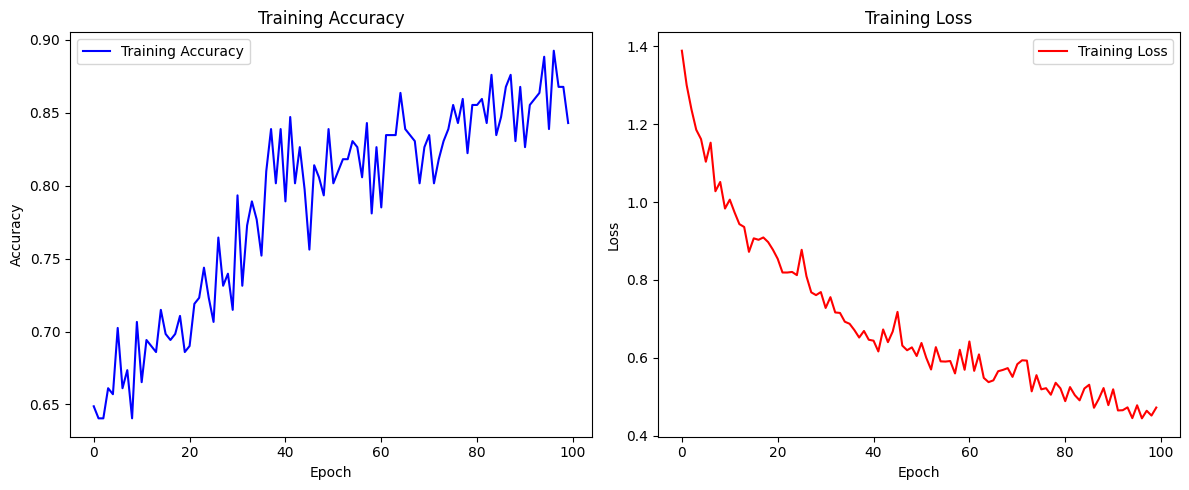

In [151]:
# 5. Generate the plot
plot_training_curves(history)

In [152]:
plot_training_curves_advanced(history)

In [153]:
sample_input = np.array([
    [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 1.0],
])
# Run prediction
prediction = model1.predict(sample_input)

# Print result
print("Raw prediction (sigmoid output):", prediction)

# Interpretation
if prediction[0][0] >= 0.5:
    print("Prediction: 🔴 Likely has heart disease")
else:
    print("Prediction: 🟢 Likely healthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Raw prediction (sigmoid output): [[0.94704455]]
Prediction: 🔴 Likely has heart disease


In [154]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8605 - loss: 0.4371


[0.41645491123199463, 0.868852436542511]

In [155]:
# Model3 : Modeling Experiments

tf.random.set_seed(42)

# Define the model
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model3.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning:

You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?



1/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5000 - loss: 14.6368

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning:

You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?



8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5454 - loss: 12.7340 - val_accuracy: 0.5246 - val_loss: 0.6670
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5454 - loss: 0.9036 - val_accuracy: 0.5246 - val_loss: 0.5423
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5454 - loss: 0.6306 - val_accuracy: 0.5246 - val_loss: 0.5285
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5454 - loss: 0.6554 - val_accuracy: 0.5246 - val_loss: 0.4854
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5454 - loss: 0.5995 - val_accuracy: 0.5246 - val_loss: 0.4919
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5454 - loss: 0.5908 - val_accuracy: 0.5246 - val_loss: 0.4587
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5454 - loss: 0.5783 - val_accuracy: 0.5246 - val_loss: 0.4574
Epoch 8/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5454 - loss: 0.5594 - val_accuracy: 0.5246 - val_loss: 0.4408
Epoch 9/70

In [156]:
history = model3.fit(X_train, y_train,

                    epochs=100,  # Train longer
                    batch_size=32,
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.4032 
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.4046  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3965 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3837  
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3808 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3896 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3925  
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3993 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3938 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 0.3804 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5454 - loss: 0.3722 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5454 - 

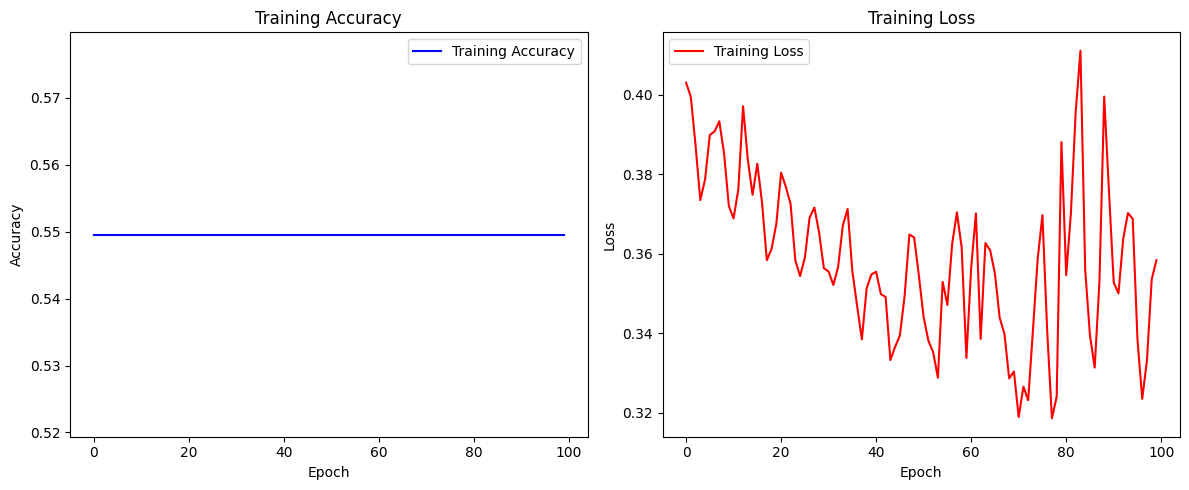

In [157]:
# 5. Generate the plot
plot_training_curves(history)

In [158]:
plot_training_curves_advanced(history)

In [159]:
sample_input = np.array([
    [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 1.0],
])
# Run prediction
prediction = model3.predict(sample_input)

# Print result
print("Raw prediction (sigmoid output):", prediction)

# Interpretation
if prediction[0][0] >= 0.5:
    print("Prediction: 🔴 Likely has heart disease")
else:
    print("Prediction: 🟢 Likely healthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Raw prediction (sigmoid output): [[1.]]
Prediction: 🔴 Likely has heart disease


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning:

You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?



In [160]:
model3.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5268 - loss: 0.4246


[0.38929182291030884, 0.5245901346206665]

In [161]:
converter=tf.lite.TFLiteConverter.from_keras_model(model1)
tfmodel=converter.convert()
open("heart_disease_pred.tflite","wb",).write(tfmodel)

Saved artifact at '/tmp/tmp6g9_3ve9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13), dtype=tf.float32, name='keras_tensor_65')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133581908983632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908980560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908977680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908978448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908981520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908978256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133581908983440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582063074576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582063074384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582063070736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582063074192: Ten

51428